In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

In [37]:
# Load CSVs
day_0_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_2.csv", delimiter=";")
day_1_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_3.csv", delimiter=";")
day_2_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_4.csv", delimiter=";")

day_0_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_2.csv", delimiter=";")
day_1_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_3.csv", delimiter=";")
day_2_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_4.csv", delimiter=";")

day_0_prices.head

<bound method NDFrame.head of         day  timestamp                     product  bid_price_1  bid_volume_1  \
0         2          0              PICNIC_BASKET2      30094.0          11.0   
1         2          0  VOLCANIC_ROCK_VOUCHER_9750        469.0          11.0   
2         2          0            RAINFOREST_RESIN       9992.0          35.0   
3         2          0  VOLCANIC_ROCK_VOUCHER_9500        718.0          11.0   
4         2          0               VOLCANIC_ROCK      10218.0         150.0   
...     ...        ...                         ...          ...           ...   
149995    2     999900  VOLCANIC_ROCK_VOUCHER_9750        417.0          20.0   
149996    2     999900              PICNIC_BASKET1      58422.0           1.0   
149997    2     999900                  CROISSANTS       4241.0         143.0   
149998    2     999900        MAGNIFICENT_MACARONS        665.0          18.0   
149999    2     999900  VOLCANIC_ROCK_VOUCHER_9500        666.0          20.0  

In [38]:
day_trades = {
    0: day_0_trades,
    1: day_1_trades,
    2: day_2_trades
}

day_prices = {
    0: day_0_prices,
    1: day_1_prices,
    2: day_2_prices
}
day = 2

In [46]:
df = day_trades[day][day_trades[day]["symbol"] == "JAMS"]

print("Unique participants in the market")

print("Buyers: ", df["buyer"].unique())
print("Sellers: ", df["seller"].unique())

df.head

Unique participants in the market
Buyers:  ['Caesar' 'Paris' 'Camilla']
Sellers:  ['Paris' 'Camilla' 'Caesar']


<bound method NDFrame.head of        timestamp   buyer   seller symbol   currency   price  quantity
0              0  Caesar    Paris   JAMS  SEASHELLS  6446.0        10
2            200  Caesar    Paris   JAMS  SEASHELLS  6445.0         5
18          1000  Caesar    Paris   JAMS  SEASHELLS  6446.0         9
25          1300  Caesar  Camilla   JAMS  SEASHELLS  6447.0        12
78          4500  Caesar  Camilla   JAMS  SEASHELLS  6450.0         9
...          ...     ...      ...    ...        ...     ...       ...
17297     996500  Caesar  Camilla   JAMS  SEASHELLS  6518.0         4
17304     997000   Paris   Caesar   JAMS  SEASHELLS  6522.0        10
17311     997800   Paris   Caesar   JAMS  SEASHELLS  6510.0        10
17322     998400  Caesar  Camilla   JAMS  SEASHELLS  6504.0         7
17326     998700  Caesar  Camilla   JAMS  SEASHELLS  6503.0        11

[1201 rows x 7 columns]>

In [40]:
buyer_info = {}
for buyer in df["buyer"].unique():
    buyer_trades = df[df['buyer'] == buyer]
    biggest_seller = buyer_trades["seller"].value_counts()
    biggest_seller = {biggest_seller.idxmax(): int(biggest_seller.max())}
    buyer_info[buyer] = {
        "frequency": len(buyer_trades),
        "buys_from": biggest_seller
    }

seller_info = {}
for seller in df["seller"].unique():
    buyer_trades = df[df['seller'] == seller]
    biggest_buyer = buyer_trades["buyer"].value_counts()
    biggest_buyer = {biggest_buyer.idxmax(): int(biggest_buyer.max())}
    seller_info[seller] = {
        "frequency": len(df[df['seller'] == seller]),
        "sells_to": biggest_buyer
    }

print("Buyers: ", json.dumps(buyer_info, indent=4))
print("")
print("Sellers: ", json.dumps(seller_info, indent=4))

Buyers:  {
    "Caesar": {
        "frequency": 769,
        "buys_from": {
            "Paris": 423
        }
    },
    "Paris": {
        "frequency": 423,
        "buys_from": {
            "Caesar": 416
        }
    },
    "Camilla": {
        "frequency": 9,
        "buys_from": {
            "Paris": 9
        }
    }
}

Sellers:  {
    "Paris": {
        "frequency": 432,
        "sells_to": {
            "Caesar": 423
        }
    },
    "Camilla": {
        "frequency": 353,
        "sells_to": {
            "Caesar": 346
        }
    },
    "Caesar": {
        "frequency": 416,
        "sells_to": {
            "Paris": 416
        }
    }
}


## Notes

* Caesar and Paris are big players in this market on both sides
* Camilla a big player on sell side
* Camilla seems to only sell --> short position
* Only time she bought was w/ Paris NOT Caesar
* Caesar buys everyone else's offers
* Caesar has more buys than sells --> long position

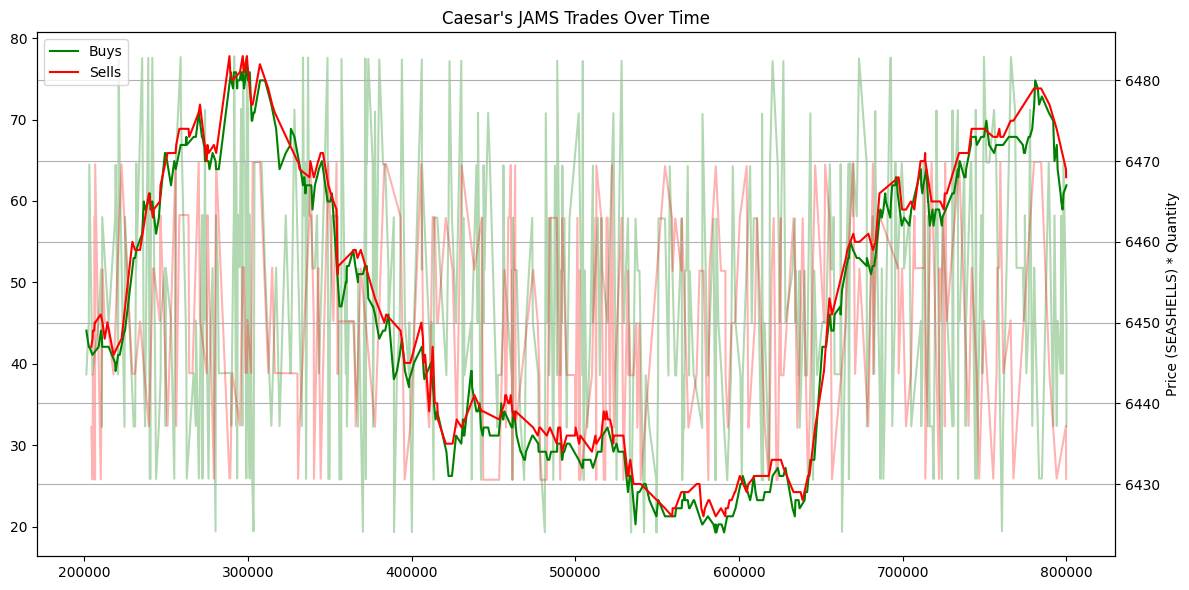

In [47]:
# Lets examine Caesar (JAMS)
df_caesar_buys = df[(df['buyer'] == 'Caesar')]
df_caesar_sells = df[(df['seller'] == 'Caesar')]

df_caesar_buys = df_caesar_buys[(df_caesar_buys['timestamp'] >= 200000) & (df_caesar_buys['timestamp'] <= 800000)]
df_caesar_sells = df_caesar_sells[(df_caesar_sells['timestamp'] >= 200000) & (df_caesar_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Caesar's buys in green
ax1.plot(df_caesar_buys["timestamp"], df_caesar_buys["price"] * df_caesar_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.3)

# Plot Caesar's sells in red
ax1.plot(df_caesar_sells["timestamp"], df_caesar_sells["price"] * df_caesar_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)

ax2 = ax1.twinx()

# Plot Caesar's buys in green
ax2.plot(df_caesar_buys["timestamp"], df_caesar_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot Caesar's sells in red
ax2.plot(df_caesar_sells["timestamp"], df_caesar_sells["price"], 
            color='red', label='Sells', alpha=1)

plt.xlabel("Timestamp")
plt.ylabel("Price (SEASHELLS) * Quantity")
plt.title("Caesar's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Caesar's trades seem to have a constant vwap despite varying prices
* Seems to be generally bullish

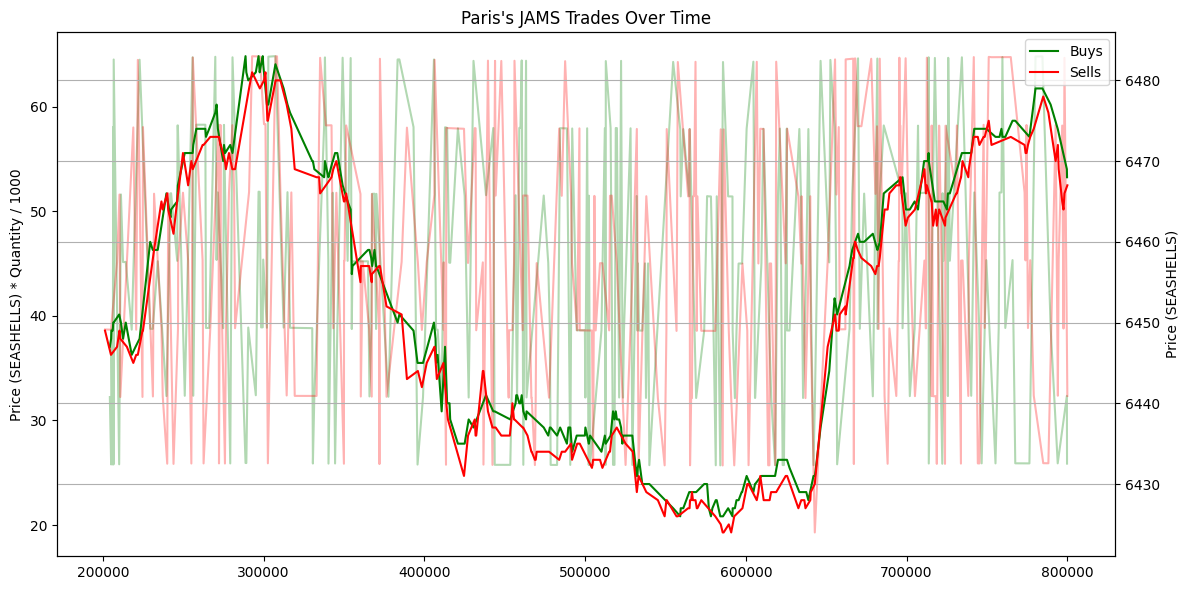

In [42]:
# Lets examine Paris (JAMS)
df_paris_buys = df[(df['buyer'] == 'Paris')]
df_paris_sells = df[(df['seller'] == 'Paris')]

df_paris_buys = df_paris_buys[(df_paris_buys['timestamp'] >= 200000) & (df_paris_buys['timestamp'] <= 800000)]
df_paris_sells = df_paris_sells[(df_paris_sells['timestamp'] >= 200000) & (df_paris_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot paris's buys in green
ax1.plot(df_paris_buys["timestamp"], df_paris_buys["price"] * df_paris_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.3)

# Plot paris's sells in red
ax1.plot(df_paris_sells["timestamp"], df_paris_sells["price"] * df_paris_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)
ax1.set_ylabel("Price (SEASHELLS) * Quantity / 1000")


ax2 = ax1.twinx()

# Plot paris's buys in green
ax2.plot(df_paris_buys["timestamp"], df_paris_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot paris's sells in red
ax2.plot(df_paris_sells["timestamp"], df_paris_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Paris's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Paris's trades seem to be even more consistent when it comes to vwap
* Seems to be market neutral...

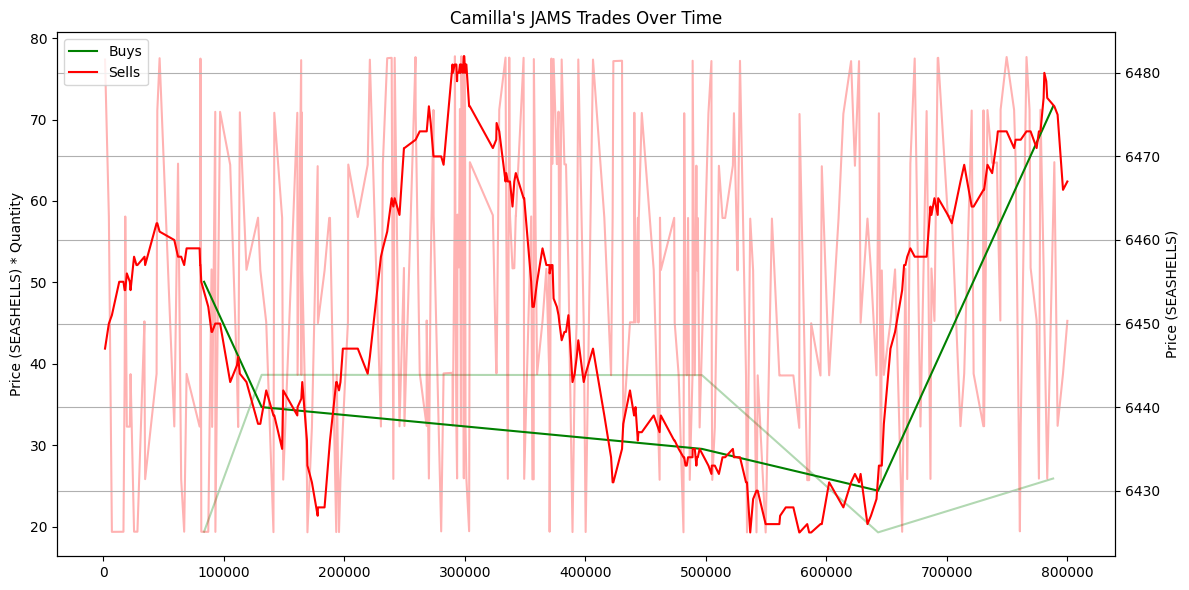

In [43]:
# Lets examine Camilla (JAMS)
df_camilla_buys = df[(df['buyer'] == 'Camilla')]
df_camilla_sells = df[(df['seller'] == 'Camilla')]

df_camilla_buys = df_camilla_buys[(df_camilla_buys['timestamp'] >= 000000) & (df_camilla_buys['timestamp'] <= 800000)]
df_camilla_sells = df_camilla_sells[(df_camilla_sells['timestamp'] >= 000000) & (df_camilla_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot camilla's buys in green
ax1.plot(df_camilla_buys["timestamp"], df_camilla_buys["price"] * df_camilla_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.3)

# Plot camilla's sells in red
ax1.plot(df_camilla_sells["timestamp"], df_camilla_sells["price"] * df_camilla_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)
ax1.set_ylabel("Price (SEASHELLS) * Quantity")


ax2 = ax1.twinx()

# Plot camilla's buys in green
ax2.plot(df_camilla_buys["timestamp"], df_camilla_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot camilla's sells in red
ax2.plot(df_camilla_sells["timestamp"], df_camilla_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Camilla's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Potential JAMS Strat

* Buy when Camilla has a vwap buy order of > 35
* Sell when Camilla puts in buy order of < 35

In [44]:
# Projected PNL for this strategy

buy_timestamps = df_camilla_buys[ df_camilla_buys["price"] * df_camilla_buys["quantity"] >= 35000 ]
sell_timestamps = df_camilla_buys[ df_camilla_buys["price"] * df_camilla_buys["quantity"] <= 35000 ]

running_pnl = 0
position = 0
last_price = 0

df = day_prices[day][(day_prices[day]["product"] == "JAMS")]

for timestamp in range(0, 1_000_000, 100):
    
    if position > 0:
        running_pnl += (df[df["timestamp"] == timestamp]["mid_price"].iloc[0] - last_price) * position

    
    if(timestamp in buy_timestamps["timestamp"].values):
        value = df[df["timestamp"] == timestamp]["ask_price_1"].iloc[0]
        print("here")

        if position < 0:

                running_pnl += (value * position)
            
        position = 350

    if(timestamp in sell_timestamps["timestamp"].values):
        value = df[df["timestamp"] == timestamp]["bid_price_1"].iloc[0]
        print("here")
        if position > -350:

            if position < 0:
                running_pnl += ((position - (-350)) * value)
                
        position = -350

    last_price = df[df["timestamp"] == timestamp]["mid_price"].iloc[0]



print(running_pnl)
    
        

here
here
here
here
here
-2257850.0
